# Image Analysis and Integration
---
* Integration of ODEs
* Filtering noisy images
* Basics of edge detection

## Automatise the Gaussian fit
---
See the full python script `multiple-gauss-fits.py` for the automatised analysis (fitting the caussian curve) of larger amounts of data. 

---

In [89]:
import numpy as np
import matplotlib.pyplot as plt 

# needed only in jupyter and this session ---
# please ignore
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'DejaVu Sans','size': 20})

## Integration of an Ordinary Differential Equation
---
Commonly known as initial value problems, the integrations of ODEs with some given starting value is very common in scientific computing. In particular if the evolution in time of some variable is considered, the numerical solution of initial value problems is often helpful. Especially for the case, in which no analytical solution is present.

Such a problem usually has the form:

$$\frac{dy}{dt} = f(y,t) \qquad y(t=t_0)=y_0$$

where we want to know $y(t)$ and know the initial value $y_0$.

Here I present you the main idea of integrating ODEs using the `scipy` function [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp), but [many more]() exist. A very popular solving algorithm is e.g. the [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (which is also the default here).

Lets consider first a very simple relationship:

$$\frac{dy}{dt} = y\sin^2(t) \qquad y(0)=0.1$$

and store this into a function.

In [442]:
def quadratic_sin(t, y):
    return y*(np.sin(t)**2)

then we can already compute the integration of the function with `solve_ivp`

__note:__ As with the computation of fits here we give the solver routine the function we want to be integrated followed by the "x-axis" (in this case the time) and the initial value(s) of y. `t_span` is the interval in which to look for solutions and `y0` is a list that can store multiple values

In [461]:
from scipy.integrate import solve_ivp

solution = solve_ivp(quadratic_sin, t_span=[0, 10], y0=[0.1], dense_output=True)

In [457]:
print("Time array of the solution: {}\n\nsolution values: {}".format(solution.t, solution.y))

Time array of the solution: [0.00000000e+00 1.00000000e-04 1.10000000e-03 1.11000000e-02
 1.11100000e-01 1.11110000e+00 2.21530046e+00 3.31334943e+00
 4.44782667e+00 5.61719001e+00 6.70159111e+00 7.78823375e+00
 9.32220202e+00 1.00000000e+01]

solution values: [[ 0.1         0.1         0.1         0.10000005  0.10004561  0.14285897
   0.38501795  0.48185544  0.81486063  2.11622224  2.37100013  4.75791076
  11.16250018 11.849473  ]]


Lets plot the solution using further methods of our solution

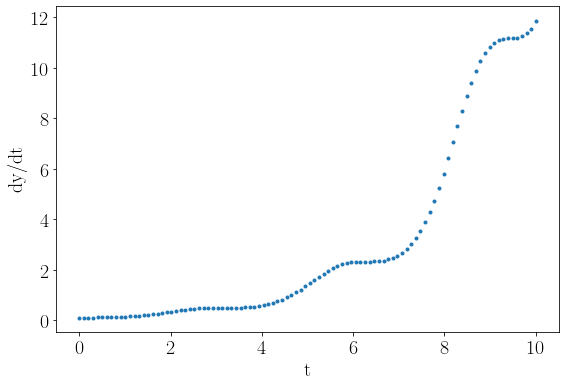

In [470]:
time = np.linspace(0,10,100)

# the function .sol() is made possible by dense_output=True
yt = solution.sol(time)

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(time, yt.T, ".")
ax.set_xlabel("t")
ax.set_ylabel("dy/dt")

fig.show()

### Multidimensional ODEs
---

Lets also consider a system of ODEs to see the full possibilities of the solvers. The classic example is the [Lotka–Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)

\begin{align}
 \frac{dx}{dt} &= a x - b x y, \\
 \frac{dy}{dt} &= c x y - d y,
\end{align}

where e.g. the $x$ is the number of some prey and $y$ is the number of their predators. While the four parameters $a,b,c$ and $d$ represent the interaction of the two species.

In [487]:
# define the Lotka-Volterra Equations
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

Now we can solve the system taking again a time span for the time variable, defining the two initial conditions (for the two species) and telling the solver which are the arguments of our function ($a,b,c$ and $d$)

In [516]:
x0=12
y0=1

abcd = [1.5, 1, 3, 1]

solution = solve_ivp(lotkavolterra, t_span=[0, 15], y0=[x0, y0], args=abcd,
                    dense_output=True)

__note:__ we had to store the two variables $x$ and $y$ into one $z$ and then expand it in the function. So here we are considering the vector that spans up the two populations

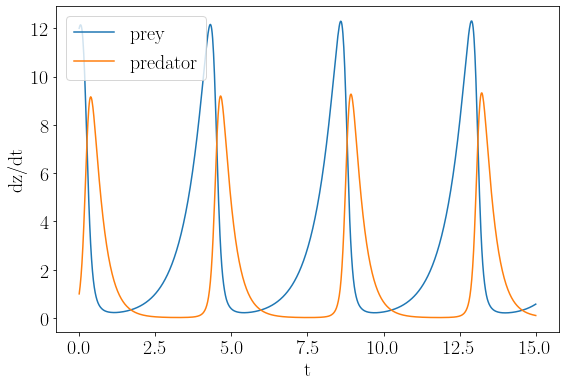

In [517]:
time = np.linspace(0,15,1000)

# the function .sol() is made possible by dense_output=True
z = solution.sol(time)

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(time, z.T)
ax.set_xlabel("t")
ax.set_ylabel("dz/dt")

ax.legend(["prey","predator"])

fig.show()


## Filters for noise

When applying operations on images often the `scipy` library has already some good tools to do that.

This usually applies to the case, in which the image is simply made of plain numbers. Indeed often images are nothing else than arrays.

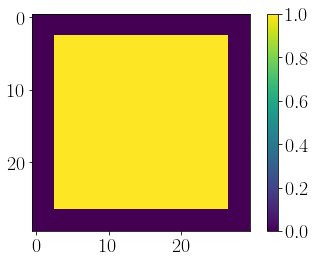

In [90]:
# create image as a 2D numpy array
im = np.zeros((30,30))
im[3:-3,3:-3]=1

plt.imshow(im)
plt.colorbar()
plt.show()

If we call the matplotlib method `imshow()` (which is able to depict nearly any image) on the array we created, then we can visualise the 2D plane.

Now we can create an artificial image and "blur" it using some methods of the `ndimage` library of `scipy` and plot them.

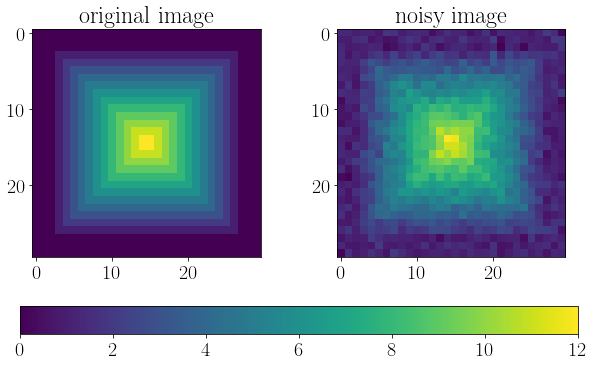

In [91]:
from scipy import ndimage

# create image
im = np.zeros((30,30))
im[3:-3,3:-3]=1

# stepwise elevate the values of the original image
im = ndimage.distance_transform_bf(im)

# add some noise on to the image
im_noise = im + 0.5*np.random.randn(*im.shape)

fig, ax = plt.subplots(1,2, figsize = (10,6))

im0 = ax[0].imshow(im)
im1 = ax[1].imshow(im_noise)

ax[0].set_title("original image")
ax[1].set_title("noisy image")


fig.colorbar(im0, ax=ax, orientation="horizontal")
# fig.colorbar(im1, ax=ax[1])

plt.show()

filter the noisy image with a median filter and a gaussian filter and depict them. Save all the data to a dictionary and loop over it on an axes grid

__question:__ do you remember how a dictionary works?

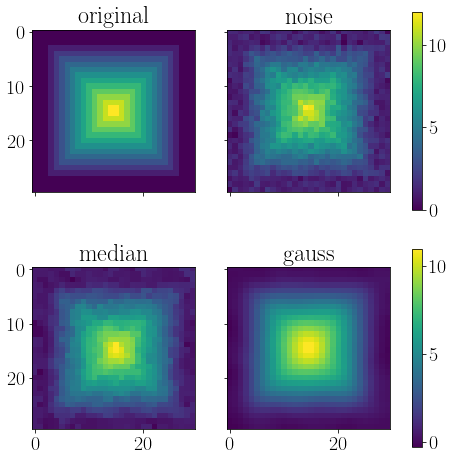

In [127]:
# filters median and Gaussian
gauss_im = ndimage.gaussian_filter(im_noise, sigma=1.5)
im_med = ndimage.median_filter(im_noise, 2)

images = {"original": im,
         "noise": im_noise,
         "median": im_med,
         "gauss": gauss_im}

fig, ax = plt.subplots(2,2, figsize = (8,8), sharey=True, sharex=True)

# dummy list to store the image instances
image = list(range(len(images)))

# generate four plots
for ind, el in enumerate(images.keys()):
    image[ind] = ax[int(ind/2),ind%2].imshow(images[el])
    ax[int(ind/2),ind%2].set_title(el)
    
# colorbars for original figures and filtered ones
fig.colorbar(image[0], ax=ax[0,:])
fig.colorbar(image[-1], ax=ax[1,:])

fig.show()

One can now tune the single filtering arguments of the functions to visually get the best filtered data from the noisy data. A good way to do this is to compute the error of the filtering.

The last step to take when filtering usually is a check of the quality of the filtering process by subtracting the original figure and the filtered one (we can do this also for the noisy image). This is the error that again can be depicted.

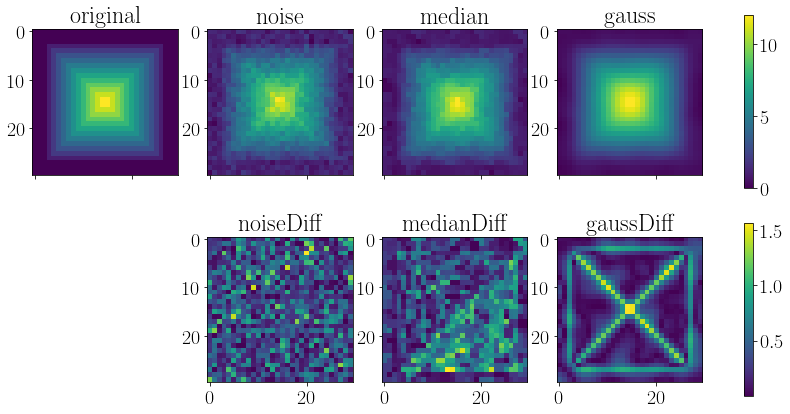

In [163]:
# store the differences in the dictionary
images["noiseDiff"] = np.abs(im - im_noise)
images["medianDiff"] = np.abs(im - im_med)
images["gaussDiff"] = np.abs(im - gauss_im)


# ndimage.median_filter(im_noise, 3)

fig, ax = plt.subplots(2,4, figsize=(15,7), sharex=True)

ima = list(range(len(images)+1))

for ind, el in enumerate(images.keys()):
    if ind > 3:
        ind += 1
    ima[ind] = ax[int(ind/4),ind%4].imshow(images[el])
    ax[int(ind/4),ind%4].set_title(el)
    
fig.colorbar(ima[0], ax=ax[0,:])
fig.colorbar(ima[-3], ax=ax[1,:])
    
ax[1,0].axis("off")

fig.show()

## Basic real image analysis
--- 

The above example was great to show how filtering works, but often one is confronted with real images.

A library that allows further image analysis is `scikit-image`. There many images are stored for demonstration purposes. Lets take the image of a retina for some analysis.

__note:__ be aware of the fact that images often have more attributes than only the numerical values of the 2D plane, as the one we constructed above. Nevertheless the numerical values are often extracted with `getattr()` command. (this depends on the type of image).

To the extracted numbers we can apply some cuts with numpy using e.g. `np.where()`

In [191]:
# short explaination of np.where()

# take an array and apply a condition
a = np.arange(10)

# go through a and look for where it is < 5 and replace that by the second entry, else by the third
np.where(a<5, 1, a+100)

array([  1,   1,   1,   1,   1, 105, 106, 107, 108, 109])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


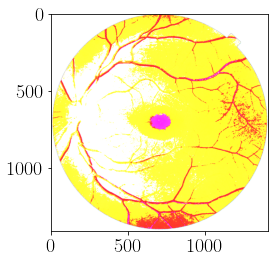

In [303]:
from skimage import data as dt

retina = getattr(dt, "retina")()
ima = retina

# detect all darker regions and cler the rest 
ima = np.where(ima < 65, ima, 10000)
ima = np.where(ima > 35, ima, 1000)

plt.imshow(ima)

The new image can now already be analysed a bit more, since we eliminated many superflous regions.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


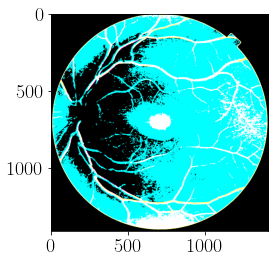

In [256]:
# apply a Sobel filter
sx = ndimage.sobel(ima, axis = -1, mode = 'nearest')

plt.imshow(sx)

Repating the process with `np.where()` allows to confine the region where some specific structure are located (e.g. here the capillars of the retina). Pinning down the exact values of structures in figures is often hard and needs a lot of adaptation work for each individual image.

One could also try different filters, check the long list of possibilities [here](https://docs.scipy.org/doc/scipy/reference/ndimage.html). It pretty much depends on the needs of what has to be shown to make a choice.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


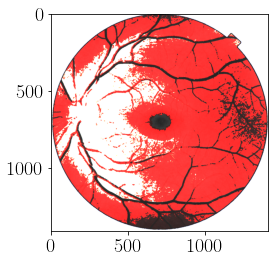

In [301]:
# apply a rank filter
sy = ndimage.rank_filter(ima, rank = 2, size = 4)

plt.imshow(sy)

## Edge detection and length computation
---
More image analysis is possible with the [opencv](https://pypi.org/project/opencv-python/) library, which is imported as `cv2`. This library has the previous concepts wrapped in single line functions and much more.

For example we can use the [Canny](https://en.wikipedia.org/wiki/Canny_edge_detector) routine/algorithm to detect edges, like we were doing above with `np.where` and the Sobel filter.

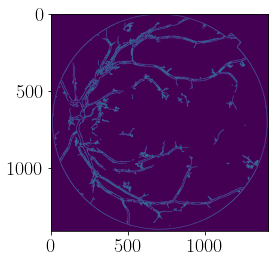

In [328]:
import cv2

# Canny takes 3 arguments: image, min and max val, 
edges = cv2.Canny(retina, 0, 80, L2gradient=False)


plt.imshow(edges)

"Zoom" into the a region of the image (opencv has routines to do this automatically). Then set all non-zero values in the region to 1 and get the corresponding indices.

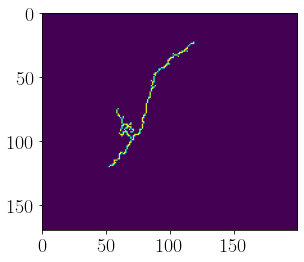

In [360]:
ymin,ymax=730,900
xmin, xmax = 1000,1200

plt.imshow(edges[ymin:ymax, xmin:xmax])

# save region to array
boxed_region = edges[ymin:ymax, xmin:xmax]
boxed_region = np.where(boxed_region == 0, 0, 1)
indx, indy = np.where(boxed_region==1)[0], np.where(boxed_region==1)[1]

Compute the distance between the initial and ending point of the selected area using the `scipy` function pdist

Distance in px from initial to end point: 117.324

Assume a retina diameter of 1.1 cm. With 1411 pixels in the original image
distance is roughly: 0.0915 cm


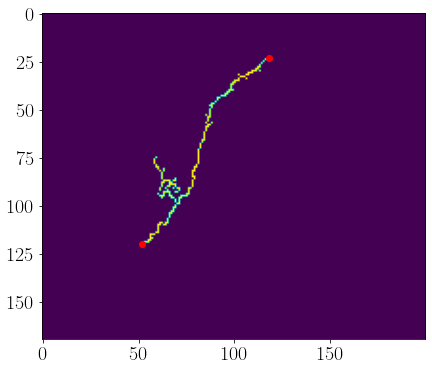

In [387]:
from scipy.spatial.distance import pdist

end_point = [max(indy),min(indx)]
initial_point = [min(indy), max(indx)]

# distance in px
pxdist = float(pdist(np.array((end_point,initial_point)), metric='euclidean'))
# total nr of pixels, diameter [cm]
totalpx = edges.shape[0]
retinadiam = 1.1
realdist = pxdist*retinadiam/totalpx

print("Distance in px from initial to end point: {:0.3f}".format(pxdist))
print("\nAssume a retina diameter of {} cm. With {} pixels in the original image\ndistance is roughly: {:.4f} cm".
     format(retinadiam, totalpx, realdist))


fig, ax = plt.subplots(1,1, figsize=(9,6))

ax.imshow(boxed_region)
ax.plot(*initial_point, "ro")
ax.plot(*end_point, "ro")

fig.show()

These are only some of the possibilities for analysing images, many more exist.

Please explore the functions of `opencv` (a tutorial can be found [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)), since there are plenty of possibilities.

__remark:__ When analysing images always keep in mind that they often are just arrays of numbers that can be simply processed using [numpy](https://numpy.org/) and other [scipy](https://scipy.org/) functionalities.

## Assignments
---
* Modify the Lotka-Volterra Equations adding a third species that interacts with the other two. Play around with the parameters until you find a configuration, which all three "survive" untill at least $t=$ 
* Generate a scattered surface with "noisy" circular balls using only numpy. Then apply filters to reconstruct the original shapes on the plane and plot the errors.
* Analyse the cell figure that you can find on [scikit-learn](https://scikit-image.org/docs/stable/auto_examples/data/plot_scientific.html#sphx-glr-download-auto-examples-data-plot-scientific-py) and try to confine the location of the cell using `scipy` filters and `numpy` only. Is there a way to automatically identify the position of the cell?